# Train a CNN model from the start with inverted functions

Hmmmmm Cannot seem to train our CNN model here. 

Looks like the best upright waveform is the best way to train the CNN model.

1
2
3
4


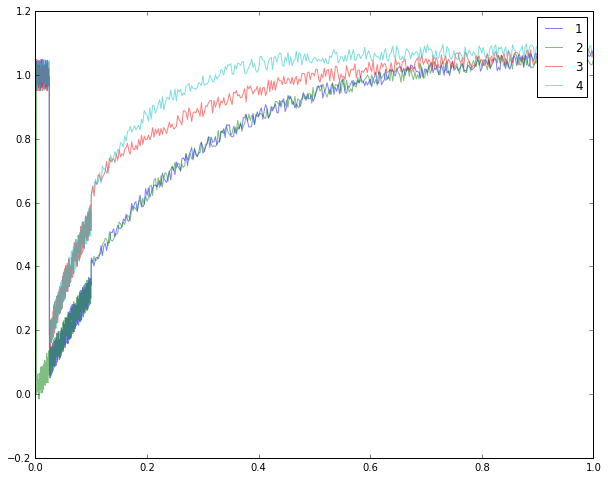

Separation
training label
test label


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3998, 16)          64        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3996, 32)          1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1998, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1998, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 63936)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4091968   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

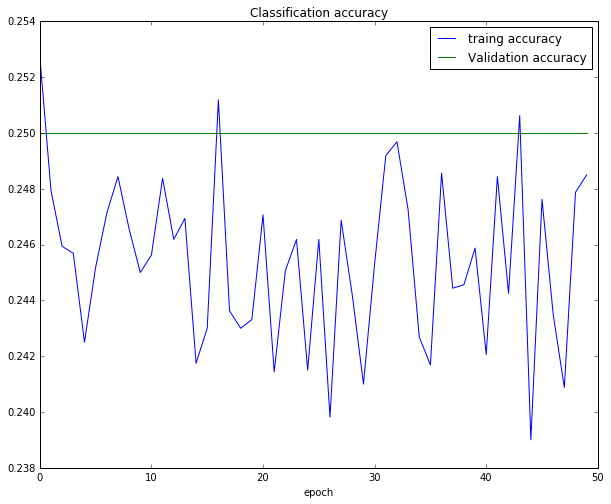

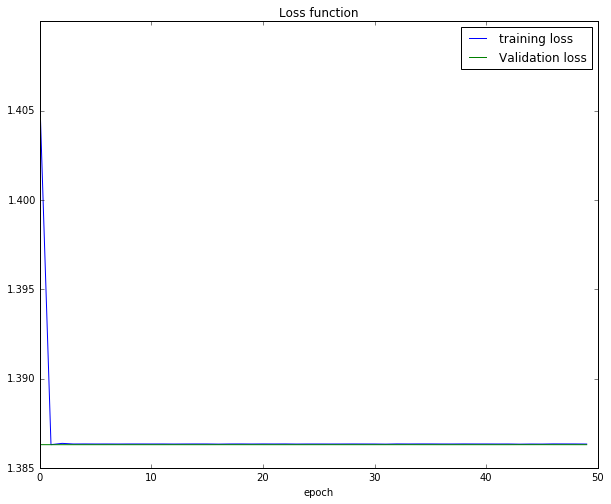

Classification accuracy = 0.249999999726


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0)

noise = 0.1

n = 5000
no_of_x = 4000
Rise_signal = 1

def x_generator(n):
    input_x = np.zeros((n,no_of_x))
    mid = int(n*0.5)
    for i in range(n):
        input_x[i] = np.arange(0,1,0.00025)
    return input_x

x_axis = x_generator(n)

"""Noise manipulator"""

def slowvary(no_of_x,noise):
	z = np.random.rand(int(no_of_x/10.+1.))*noise
	y = np.zeros(no_of_x)
	for i in range(no_of_x):
		y1 = int(i/10.)
		y2 = int(i/10.+1)
		f = z[y2]-z[y1]
		y[i] = z[y1] + f*(i%10)/10.
	return y

def noisegen(x, no_of_x):
    y = np.zeros(no_of_x)
    y1 = no_of_x-400
    y2 = 0.5*x
    test = slowvary(y1,y2)
    for i in range(no_of_x):
        if i <400:
            y[i] = np.random.rand(1)*x - x/2.
        else:
            y[i] = test[i-400]-0.1
    return y

""" functions """

def beta(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]*4
        yall[i] = np.piecewise(y, [y<0.1, y>=0.1], [lambda y:0, lambda y: np.exp(-y)])
        yall[i] = yall[i] + noisegen(noise,no_of_x)
        yall[i] = 1. - yall[i]
    return yall

def gamma(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        pileup = np.random.rand(1)*0.4
        y = x[i]*4
        yall[i] = np.piecewise(y, [y < 0.1, y>=0.1 , y >= pileup], [lambda y:0 ,lambda y:0.3*np.exp(-y), lambda y:np.exp(-y)])
        yall[i] = yall[i] + noisegen(noise,no_of_x)
        yall[i] = 1. - yall[i]
    return yall

def alt1(x):
    yall = np.zeros((n,no_of_x))
    half = 0.5
    for i in range(n):
        y = x[i]*4
        yall[i] = np.piecewise(y, [y < 0.1, y>=0.1, y >= half], [lambda y:0 ,lambda y:np.exp(-2*y), lambda y:np.exp(-(y+0.5))])
        yall[i] = yall[i] + noisegen(noise,no_of_x)
        yall[i] = 1. - yall[i]
    return yall

def alt3(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        y = x[i]*4
        yall[i] = np.piecewise(y, [y<0.1, y>=0.1], [lambda y:0,lambda y:np.exp(-2*y)])
        yall[i] = yall[i] + noisegen(noise,no_of_x)
        yall[i] = 1. - yall[i]
    return yall

x1 = beta(x_axis)
print("1")
x2 = gamma(x_axis)
print("2")
x3 = alt1(x_axis)
print("3")
x4 = alt3(x_axis)
print("4")

plt.figure()
plt.plot(x_axis[1],x1[1],label="1",alpha=0.5)
plt.plot(x_axis[1],x2[1],label="2",alpha=0.5)
plt.plot(x_axis[1],x3[1],label="3",alpha=0.5)
plt.plot(x_axis[1],x4[1],label="4",alpha=0.5)
plt.legend()
plt.show()

def separation(x,ratio):
	train = np.zeros((int(len(x)*ratio),no_of_x))
	test = np.zeros((int(len(x)*(1.-ratio)),no_of_x))
	for i in range(n):
		if i < (n*ratio):
			train[i] = x[i]
		if i >= (n*ratio):
			k = i - int(n*ratio) - 1
			test[k] = x[i]
	return train, test

train_beta, test_beta = separation(x1,0.8)
train_gamma, test_gamma  = separation(x2,0.8)
train_3, test_3  = separation(x3,0.8)
train_4, test_4  = separation(x4,0.8)
print("Separation")

def labelling(x,num):
	label = np.zeros(len(x))
	for i in range(len(x)):
		label[i] = num
	return label

label_train_beta = labelling(train_beta,0)
label_train_gamma = labelling(train_gamma,1)
label_train_3 = labelling(train_3,2)
label_train_4 = labelling(train_4,3)
print("training label")

label_test_beta = labelling(test_beta,0)
label_test_gamma = labelling(test_gamma,1)
label_test_3 = labelling(test_3,2)
label_test_4 = labelling(test_4,3)
print("test label")

data_train = np.concatenate((train_beta,train_gamma,train_3,train_4), axis=0)
data_test = np.concatenate((test_beta,test_gamma,test_3,test_4), axis=0)
label_train = np.concatenate((label_train_beta,label_train_gamma,label_train_3,label_train_4),axis=0)
label_test = np.concatenate((label_test_beta,label_test_gamma,label_test_3,label_test_4),axis=0)

data_train = np.expand_dims(data_train,axis=2)
data_test = np.expand_dims(data_test,axis=2)

import keras

classes = 4

label_train = keras.utils.to_categorical(label_train, classes)
label_test = keras.utils.to_categorical(label_test, classes)

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization

from keras.regularizers import l2
from keras.optimizers import SGD

""" Convulution Neural Network """

model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation="relu", input_shape=(no_of_x,1)))
model.add(Conv1D(32, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes,activation="softmax"))
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(data_train, label_train, batch_size=50, epochs=50, verbose=1, validation_data=(data_test,label_test))
score = model.evaluate(data_test, label_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(history.history.keys())
plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history.history['acc'],label="traing accuracy")
plt.plot(history.history['val_acc'],label="Validation accuracy")
plt.legend(loc=4)
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history.history['val_acc'][-1])